In [1]:
from typing import List, Dict, Iterable, Tuple, Callable
from matplotlib import pyplot as plt
from collections import Counter
# import pygal
import sys
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
import numpy as np
import math
import pandas as pd
# from IPython import qt
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get
from matplotlib import pyplot as plt
# from scratch.working_with_data import rescale
# from scratch.multiple_regression import least_squares_fit, predict
# from scratch.gradient_descent import gradient_step

# from stats import mean, median, de_mean, standard_deviation, correlation
# from gradient_descent import minimize_stochastic, maximize_stochastic, maximize_batch
# from vector import dot, vector_add
# from normal import normal_cdf
# from matrix import make_matrix, get_column, shape, matrix_multiply
# from logistic_regression import *

import math
import os
import random
import sys
from functools import partial, reduce
import scipy
from scipy.optimize import fmin_tnc

In [2]:
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

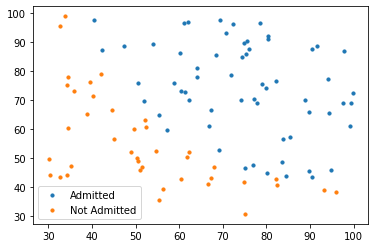

In [3]:
# load the data from the file
data = load_data("marks.txt", None)

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()



In [4]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]


C:\Users\USER\AppData\Local\Temp/ipykernel_28924/4134252738.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


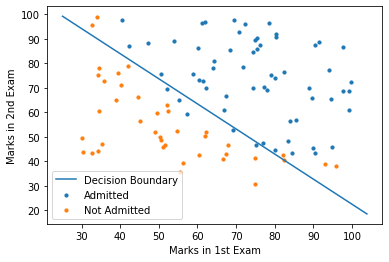

In [5]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

parameters = fit(X, y, theta)

x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()